<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/02_Regresion-Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal
## 1. Importar librerias

In [0]:
## Basicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## Datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## ML
from sklearn.linear_model import LinearRegression

## 2. Importar Datos

In [0]:
url = 'https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/Salarios.csv'
dataset = pd.read_csv(url)
dataset.head()

,experiencia,salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [0]:
dataset.describe()

,experiencia,salario
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   experiencia  30 non-null     float64
 1   salario      30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## 3. Trabajar con los datos

### 3.1 Separar entrenamiento y pruebas

In [0]:
## cantidad de registros en X
len(X)

30

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
print("Registros en X_train "+str(len(X_train)))
print("Registros en X_test "+str(len(X_test)))

Registros en X_train 21
Registros en X_test 9


In [0]:
print(X_train)
print("------")
print(y_train)


[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
------
[101302  56642  66029  64445  61111 113812  91738  46205 121872  60150
  39891  81363  93940  57189  54445 105582  43525  39343  98273  67938
  56957]


### 3.2 Normalizar datos

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

print(X_train)
print("------")
print(y_train)


[[ 1.17920075]
 [-0.77373425]
 [ 0.08555715]
 [-0.65655815]
 [-0.14879505]
 [ 1.29637685]
 [ 0.74955505]
 [-1.39867344]
 [ 2.19472695]
 [-0.73467555]
 [-1.04714515]
 [ 0.39802675]
 [ 0.43708545]
 [-0.46126465]
 [-0.65655815]
 [ 1.60884645]
 [-1.12526255]
 [-1.47679084]
 [ 0.86673115]
 [ 0.00743975]
 [-0.34408855]]
------
[[ 1.16815838]
 [-0.64093526]
 [-0.26068533]
 [-0.32485022]
 [-0.45990437]
 [ 1.67491524]
 [ 0.7807385 ]
 [-1.06371874]
 [ 2.00141086]
 [-0.4988327 ]
 [-1.31948715]
 [ 0.36046653]
 [ 0.86993743]
 [-0.61877731]
 [-0.72993165]
 [ 1.34153322]
 [-1.17228056]
 [-1.34168561]
 [ 1.04545921]
 [-0.18335528]
 [-0.62817519]]


## 4. Crear Modelo ML

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



In [0]:
#comparemos
print("y_test" + str(y_test))
print("y_pred" + str(y_pred))

y_test[ 37731 122391  57081  63218 116969 109431 112635  55794  83088]
y_pred[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [0]:
# cambio el formato
np.set_printoptions(precision=0)
# más especifico con .format https://mkaz.blog/code/python-string-format-cookbook/

In [0]:
print("y_test" + str(y_test))
print("y_pred" + str(y_pred))

y_test[ 37731 122391  57081  63218 116969 109431 112635  55794  83088]
y_pred[ 40818. 123188.  65154.  63282. 115700. 108212. 116636.  64218.  76387.]


## 5. Analizar resultados

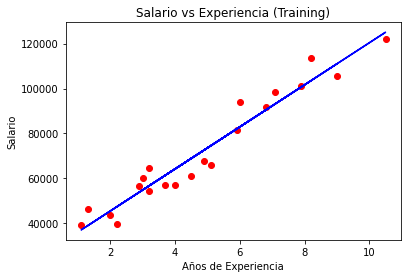

In [0]:
# Resultados de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salario vs Experiencia (Training)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()


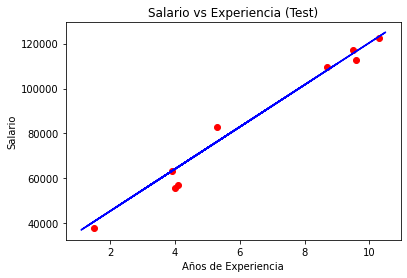

In [0]:
# Resultados de pruebas
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salario vs Experiencia (Test)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

In [0]:
regressor.score(X_test,y_test)

0.9740993407213511